<a href="https://colab.research.google.com/github/singh1811/Machine_learning_projects/blob/main/Salary_Estimation_Using_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np

In [27]:
from google.colab import files
uploaded = files.upload()

Saving salary p2.csv to salary p2 (1).csv


In [44]:
dataset=pd.read_csv("salary p2.csv")
print(dataset.shape)
dataset.head(5)

(32561, 5)


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [45]:
x=dataset.iloc[:, :-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

Mapping Salary Data to binary value

In [46]:
income_set=set(dataset['income'])
dataset ['income']= dataset['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(dataset.head(5))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [49]:
y= dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

Splitting into train and test


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)

Feature Scaling(Preprocessing)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Finding best K-value

Text(0, 0.5, 'error')

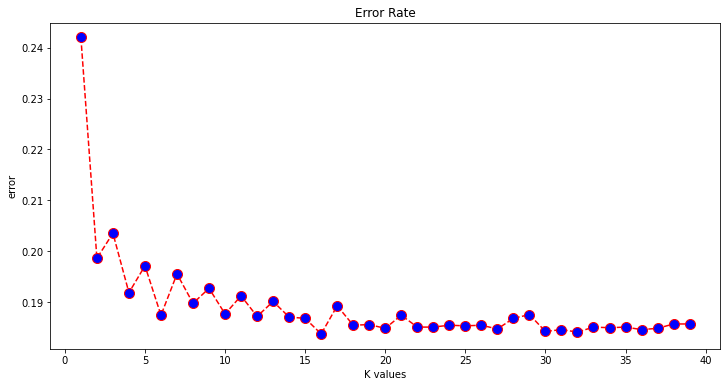

In [61]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#calculate error for K values between 1 to 40
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i=model.predict(x_test)
  error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate')
plt.xlabel('K values')
plt.ylabel('error')

Training

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=16,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

Prediction


In [68]:
age=int(input("Enter new age of employee:"))
education=int(input("Enter new employee's education:"))
Capital_gain=int(input("Enter new employee's capital_gain:"))
Hours_per_week=int(input("Enter new employee's hours_per_week:"))
new_employee=[[age,education,Capital_gain,Hours_per_week]]
process=sc.transform(new_employee)
result= model.predict(process)
if result==0:
  print("Employee might got salary below 50K")
else:
  print("Employee might get salary above 50K")


Enter new age of employee:34
Enter new employee's education:9
Enter new employee's capital_gain:0
Enter new employee's hours_per_week:45
Employee might got salary below 50K


Predicting for all data

In [70]:
y_predict=model.predict(x_test)
print(np.concatenate((y_predict.reshape(len(y_predict),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)

print("Confusion matrix:",cm)
print("Accuracy: {0}%".format(accuracy_score(y_test,y_predict)*100))


Confusion matrix: [[5882  311]
 [1185  763]]
Accuracy: 81.62387913032796%
